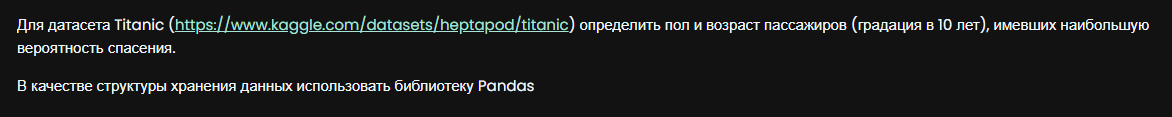

# Init

## Download Kaggle + setting up api file

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download & unzip dataset

In [2]:
! kaggle datasets download -d heptapod/titanic
! unzip titanic.zip

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 17.0MB/s]
Archive:  titanic.zip
  inflating: train_and_test2.csv     


# Dataset

## Read dataset

In [21]:
import pandas as pd

dataset = pd.read_csv("train_and_test2.csv")

dataset.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

## Fix dataset columns

In [22]:
dataset.drop(dataset.columns[5:12], axis=1, inplace=True)
dataset.drop(dataset.columns[6:14], axis=1, inplace=True) # [12:21]
dataset.drop(dataset.columns[6:9], axis=1, inplace=True) # [21:23]
dataset.drop(dataset.columns[7:9], axis=1, inplace=True) # [23:26]

dataset.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Embarked',
       '2urvived'],
      dtype='object')

## Clear missing (Optional)

,Passengerid,Age,Fare,Sex,sibsp,Parch,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,2.0,0
1,2,38.0,71.2833,1,1,0,0.0,1
2,3,26.0,7.9250,1,0,0,2.0,1
3,4,35.0,53.1000,1,1,0,2.0,1
4,5,35.0,8.0500,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,2.0,0
1305,1306,39.0,108.9000,1,0,0,0.0,0
1306,1307,38.5,7.2500,0,0,0,2.0,0
1307,1308,28.0,8.0500,0,0,0,2.0,0


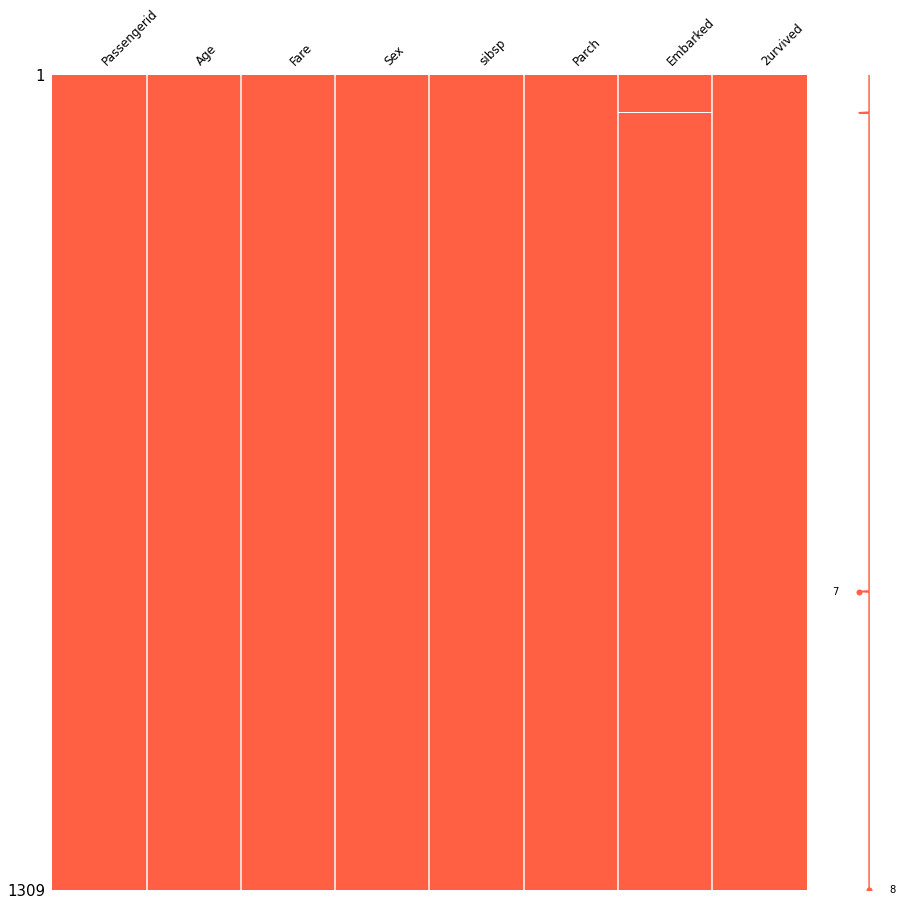

In [8]:
import missingno

missingno.matrix(dataset, figsize=(15,15), fontsize=12, color=(1, 0.38, 0.27));
dataset.dropna(subset=['Age','Sex','2urvived'])

# Analitics

## Creating dataset of survived

In [9]:
dataset_surv = pd.DataFrame(dataset[dataset['2urvived']==1])
dataset_surv.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Embarked,2urvived
1,2,38.0,71.2833,1,1,0,0.0,1
2,3,26.0,7.9250,1,0,0,2.0,1
3,4,35.0,53.1000,1,1,0,2.0,1
8,9,27.0,11.1333,1,0,2,2.0,1
9,10,14.0,30.0708,1,1,0,0.0,1


## Plot survived info

### Gender pie

Text(0.5, 1.0, 'Gender Distribution (survived)')

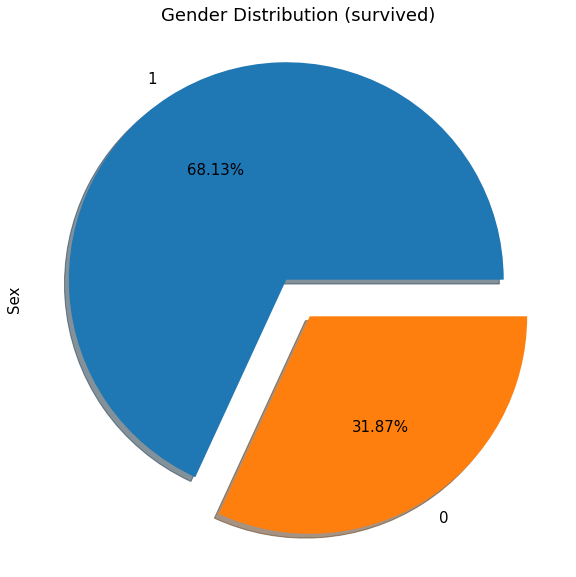

In [11]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
dataset_surv['Sex'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, figsize=[10,10])
plt.title('Gender Distribution (survived)',color='Black',loc='center')

### Age hist

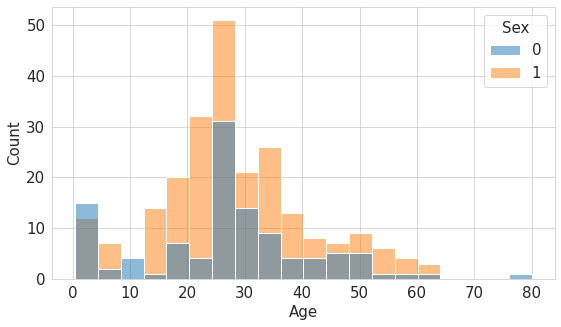

In [18]:
import seaborn as  sns
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=dataset_surv, x='Age', hue='Sex')

# Result


Как видно на графике в AgeHist - наибольшая вероятность спасения была у:
> мужчин 20-30 лет

> женщин 20-30 лет





# TMP (TESTING)

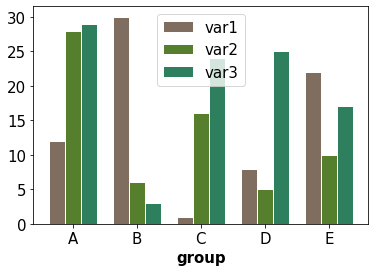

In [14]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

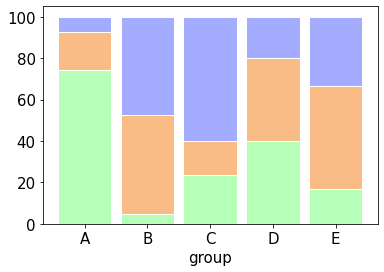

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()